In [3]:
import numpy as np
import pandas as pd
import random as rnd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from scipy.stats import *
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
df=pd.read_csv('regLinPoli2.csv')
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
0,153.782162,23648.953370,2.186906,0.155247,16,-153.782162,-23648.95337,-2.186906,-0.155247,-909.534012,...,272,-1856,1390,-4293,4171,-3493,-290,-1017,9,2.033960e+15
1,645.991251,417304.697100,2.810227,-0.923396,35,-153.782162,-23648.95337,-2.810227,0.923396,343.752475,...,-265,-3587,-2479,-1284,-2127,2369,2657,-1481,-150,4.694470e+19
2,-412.060457,169793.820200,2.614961,0.489764,-25,-153.782162,-23648.95337,-2.614961,-0.489764,-776.331121,...,9,4104,-4634,-1637,-4228,527,-1773,-1676,67,-2.017100e+18
3,35.884351,1287.686648,1.554905,-0.970388,-75,-153.782162,-23648.95337,-1.554905,0.970388,696.736200,...,-215,749,-3645,-3202,-1173,-3248,1888,1295,-49,7.629161e+10
4,-85.073496,7237.499779,1.929794,0.247883,44,-153.782162,-23648.95337,-1.929794,-0.247883,-527.805076,...,-360,2150,507,-1972,-7497,-2427,4368,670,43,-3.225260e+13


In [5]:
X=np.array(df.iloc[:,0:38]) 
y=np.array(df.iloc[:,38])

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

**estandarizacion**

In [7]:
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

m=np.mean(y_train)
sd=np.std(y_train)
y_train=(y_train-m)/sd
y_test=(y_test-m)/sd

**funcion de estimación**

In [8]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X[i]
    return suma

**regularización por renglón**    

In [9]:
def regularizado(w,x,y,lam,eta):

    for i in range(len(x)):

        sal = salida(w[0],w[1:len(w)],x[i])
        #Calculo el error de prediccion        
        error =y[i] - sal
        # Obtengo el error w0
        w[0] = w[0] + eta*error
        
    
        for j in range(len(x.T)):
            w[j+1] = w[j+1] + eta*error*X_train[i,j] - lam*w[j+1]
        
    return w

**Error con $\lambda=0$ y $\eta=0.05$**

In [10]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0,0.05)
np.mean((y_train - (ws[0]+np.dot(X_train,ws[1:len(ws)])))**2)

118.3422213350181

**Error con $\lambda=0.01$ y $\eta=0.05$**

In [11]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0.55,0.05)
np.mean((y_train - (ws[0]+np.dot(X_train,ws[1:len(ws)])))**2)

0.96154000920818061

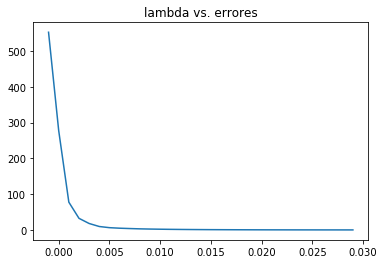

In [13]:
import random as rnd
lam = np.arange(-0.001,0.03,0.001)
error_lambda = []

for l in range(lam.size):
    w= [rnd.random() for i in range(X_train.shape[1]+1)]

    w =regularizado(w,X_train,y_train,lam[l],0.05)
    error_lambda = error_lambda + [np.mean((y_train - (w[0]+ np.dot(X_train,w[1:len(w)])))**2)]
    
plt.plot(lam,error_lambda)
plt.title('lambda vs. errores')

# MINIBATCH

**Calculamos las w's por bloques de datos y no por renglones**

In [14]:
def agregar_unos(m):
    unos = np.array([np.ones(m.shape[0])])
    return np.concatenate((unos.T,m),axis=1)

**Regularización para 1 bloque de datos(Pudieran ser todos)**

In [15]:
def wreg(w,x,y,eta,lamb):
    #w=np.ones(len(np.transpose(x))+1)
    error=np.array([]) 
    w0=np.array([]) 
    w1=np.array([])
    while (np.sum((y - np.dot(w,agregar_unos(x).T))))**2 > 0.01:
        error=np.append(error,(np.sum((y - np.dot(w,agregar_unos(x).T))))**2) 
        w0=np.append(w0,w[0]) 
        w1=np.append(w1,w[1])
        #print(w[0],w[1])
        res=y-np.dot(w,agregar_unos(x).T) 
        w[0]= w[0] + (eta * np.sum(res)/len(y)) 
        for i in (range(len(x.T))):
            w[i+1]=w[i+1]+eta*np.sum(res*agregar_unos(x)[:,i+1])/len(y)-lamb*w[i+1]
        error2=np.mean((np.dot(w,agregar_unos(x).T) - y_train)**2)
    return w,error2

#w,error2=wreg(X_train,y_train,0.05,0) 

**Para $\lambda=0$**

In [16]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
w,error=wreg(w,X_train,y_train,0.05,0) 
print(w,error)
np.mean((np.dot(w,agregar_unos(X_train).T) - y_train)**2)

[0.35314331112971442, 0.75528144925718477, 0.075139245462999091, 0.44186213630217863, 0.35750517595952175, 0.055963009148080493, 0.50201390721754902, 0.85502838880126453, 0.54678278243794765, 0.36946712855526204, 0.07648750773163969, 0.12834474799971024, 0.090610558325984761, 0.099537002983109343, 0.024566188116018073, 0.020410762210446343, -0.011205740435529894, 0.069278966811130716, 0.012683885234748105, 0.065954175908610718, 0.097574816197598127, 0.085081172138998407, 0.070824410772078933, 0.089153917855300135, 0.092240641974689161, 0.13878916618372511, -0.015008911579077935, -0.0077750930443715623, 0.079955677229306132, 0.031292374338589876, -0.0038371409535092101, 0.090415123688097038, 0.033279006620055195, 0.055035974766619748, 0.064217466067426052, 0.13851333897483162, -0.014850473291936594, 0.048158521578539004, 0.058513157997493161] 0.587789568639


0.58778956863948117

**Para $\lambda=0.01$**

In [18]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
w,error=wreg(w,X_train,y_train,0.05,0.001) 
print(w,error)
np.mean((np.dot(w,agregar_unos(X_train).T) - y_train)**2)

[0.019536283153929444, 0.70258078024833703, -0.14316501332636056, 0.029743601058642134, 0.0073045465103646094, -0.023030508616196668, -0.0096932086448200741, 0.009713410185084535, -0.029714427188246604, -0.0072816176207117578, 0.022146088487831433, 0.032265486559427778, 0.014424869791942357, 0.027887505405925349, 0.026310078435481388, -0.017625684268061326, -0.015816560948995362, -0.0079027085411127948, -0.0095539174636867386, -0.0085034619689738564, 0.0019681196341808263, 0.054602108698369289, -1.7346578404969729e-05, -0.0043748725683128153, 0.016758619691200335, 0.026504783370954497, -0.026628088240413041, -0.023177675106168159, -0.0062655938181696161, -0.027126013016010548, -0.053450130575225997, -0.00059695077058305685, -0.012322601357635136, 0.0062770540238313265, -0.050289621143949047, 0.030595577223254618, -0.010976308104736729, -0.013159070351502199, -0.00094781252688989285] 0.444745949826


0.44474594982604682